<a href="https://colab.research.google.com/github/itshimanshu2602/Flight_Price_Pred/blob/main/Flight_Price_Prediction_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Flight Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_train = pd.read_excel('Data_Train.xlsx')
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_test = pd.read_excel('Test_set.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
final_df = df_train.append(df_test)
final_df.head()

<ipython-input-5-0afa4db87753>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = df_train.append(df_test)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [6]:
final_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [7]:
# Feature Engineering
final_df['Date'] = final_df['Date_of_Journey'].str.split('/').str[0]

final_df['Month'] = final_df['Date_of_Journey'].str.split('/').str[1]

final_df['Year'] = final_df['Date_of_Journey'].str.split('/').str[2]


In [8]:
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [9]:
final_df['Date'] = final_df['Date'].astype(int)
final_df['Month'] = final_df['Month'].astype(int)
final_df['Year'] = final_df['Year'].astype(int)

In [11]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int64  
 12  Month            13354 non-null  int64  
 13  Year             13354 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 1.5+ MB


In [12]:
final_df.drop('Date_of_Journey',axis = 1, inplace = True)
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [13]:
final_df['Arrival_Time'].str.split().str[0]

0       01:10
1       13:15
2       04:25
3       23:30
4       21:35
        ...  
2666    20:25
2667    16:55
2668    04:25
2669    19:15
2670    19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [14]:
final_df['Arrival_Time'] = final_df['Arrival_Time'].str.split().str[0]

In [15]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [16]:
final_df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
dtype: int64

In [19]:
final_df['Arrival_hours']= final_df['Arrival_Time'].str.split(':').str[0]
final_df['Arrival_min'] = final_df['Arrival_Time'].str.split(':').str[1]

In [20]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


In [21]:
final_df['Arrival_hours'] = final_df['Arrival_hours'].astype(int)
final_df['Arrival_min'] = final_df['Arrival_min'].astype(int)

In [22]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int64  
 11  Month            13354 non-null  int64  
 12  Year             13354 non-null  int64  
 13  Arrival_hours    13354 non-null  int64  
 14  Arrival_min      13354 non-null  int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 1.6+ MB


In [23]:
final_df.drop('Arrival_Time', axis = 1, inplace = True)

In [24]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


In [25]:
final_df['Dep_hours']= final_df['Dep_Time'].str.split(':').str[0]
final_df['Dep_min'] = final_df['Dep_Time'].str.split(':').str[1]

In [26]:
final_df['Dep_hours'] = final_df['Dep_hours'].astype(int)
final_df['Dep_min'] = final_df['Dep_min'].astype(int)

In [27]:
final_df.drop('Dep_Time', axis = 1, inplace = True)

In [28]:
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_min,Dep_hours,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50


In [29]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int64  
 9   Month            13354 non-null  int64  
 10  Year             13354 non-null  int64  
 11  Arrival_hours    13354 non-null  int64  
 12  Arrival_min      13354 non-null  int64  
 13  Dep_hours        13354 non-null  int64  
 14  Dep_min          13354 non-null  int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 1.6+ MB


In [30]:
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [33]:
final_df['Total_Stops'] = final_df['Total_Stops'].map({'non-stop' :  0, '2 stops' : 2, '1 stop' : 1, '3 stops' : 3, 'nan': 1, '4 stops' : 4})

In [32]:
final_df[final_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_min,Dep_hours,Dep_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45


In [35]:
final_df.drop('Route', axis = 1, inplace = True)

In [38]:
final_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [39]:
final_df['DH']= final_df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [40]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_min,Dep_hours,Dep_min,DH
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4


In [42]:
final_df.drop(6474, axis=0, inplace = True)
final_df.drop(2660, axis=0, inplace = True)

In [49]:
final_df['DH'] = final_df['DH'].astype(int)

In [44]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  object 
 2   Destination      13351 non-null  object 
 3   Duration         13351 non-null  object 
 4   Total_Stops      13350 non-null  float64
 5   Additional_Info  13351 non-null  object 
 6   Price            10681 non-null  float64
 7   Date             13351 non-null  int64  
 8   Month            13351 non-null  int64  
 9   Year             13351 non-null  int64  
 10  Arrival_hours    13351 non-null  int64  
 11  Arrival_min      13351 non-null  int64  
 12  Dep_hours        13351 non-null  int64  
 13  Dep_min          13351 non-null  int64  
 14  DH               13351 non-null  int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 1.6+ MB


In [45]:
final_df['DH'] = final_df['DH']*60
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_min,Dep_hours,Dep_min,DH
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,120
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,420
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,300
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,240


In [48]:
final_df['DM'] = final_df['Duration'].str.split(' ').str[1].str.split('m').str[0]


In [61]:
final_df['DM'] = final_df['DM'].astype(int)

In [60]:
final_df['DM'] = final_df['DM'].fillna('00')
final_df['DM'].isnull().sum()

0

In [64]:
final_df['Duration'] = final_df['DM'] + final_df['DH']
final_df['Duration']

0       52
1       32
2       19
3       30
4       49
        ..
2666    78
2667    37
2668    41
2669    30
2670    34
Name: Duration, Length: 13351, dtype: int64

In [65]:
final_df['DH'] = final_df['DH']*60
final_df['Duration'] = final_df['DM'] + final_df['DH']
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_min,Dep_hours,Dep_min,DH,DM
0,IndiGo,Banglore,New Delhi,170,0.0,No info,3897.0,24,3,2019,1,10,22,20,120,50
1,Air India,Kolkata,Banglore,445,2.0,No info,7662.0,1,5,2019,13,15,5,50,420,25
2,Jet Airways,Delhi,Cochin,1140,2.0,No info,13882.0,9,6,2019,4,25,9,25,1140,0
3,IndiGo,Kolkata,Banglore,325,1.0,No info,6218.0,12,5,2019,23,30,18,5,300,25
4,IndiGo,Banglore,New Delhi,285,1.0,No info,13302.0,1,3,2019,21,35,16,50,240,45


In [66]:
final_df.drop('DM', axis = 1, inplace = True)
final_df.drop('DH', axis = 1, inplace = True)
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_min,Dep_hours,Dep_min
0,IndiGo,Banglore,New Delhi,170,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,445,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,1140,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,325,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,285,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [67]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()


In [68]:
final_df['Airline'] = labelencoder.fit_transform(final_df['Airline'])
final_df['Source'] = labelencoder.fit_transform(final_df['Source'])
final_df['Destination'] = labelencoder.fit_transform(final_df['Destination'])
final_df['Additional_Info'] = labelencoder.fit_transform(final_df['Additional_Info'])

In [70]:
final_df.shape

(13351, 14)

In [71]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_min,Dep_hours,Dep_min
0,3,0,5,170,0.0,8,3897.0,24,3,2019,1,10,22,20
1,1,3,0,445,2.0,8,7662.0,1,5,2019,13,15,5,50
2,4,2,1,1140,2.0,8,13882.0,9,6,2019,4,25,9,25
3,3,3,0,325,1.0,8,6218.0,12,5,2019,23,30,18,5
4,3,0,5,285,1.0,8,13302.0,1,3,2019,21,35,16,50


/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<Axes: xlabel='Total_Stops', ylabel='Price'>

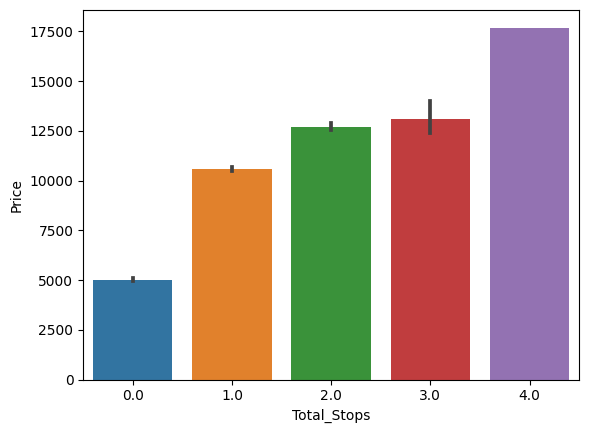

In [74]:
sns.barplot(x ='Total_Stops', y= 'Price',data = final_df)